In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from supervised.automl import AutoML
import xgboost as xgb

# Load Data
wines = pd.read_csv("wines_encoded.csv", encoding='utf-8')
data_X = wines.drop(columns='points', inplace=False).values
data_Y = wines["points"].values
all_features = wines.drop(columns='points', inplace=False).columns
num_features = len(all_features)


# Select  Top Features
model = xgb.XGBRegressor(verbosity=1)
model.fit(data_X, data_Y)
print("Model Fitted")

# Select 50 best features
sorted_idx = model.feature_importances_.argsort()
selected_features = all_features[sorted_idx][num_features-100:num_features]
data_X_selected = wines[selected_features]
selected_features_names = list(selected_features)


data_Y_selected = wines["points"]
X_train, X_test, y_train, y_test = train_test_split(data_X_selected, data_Y_selected,
                                                    test_size=0.25, random_state=42)

# train models with AutoML
automl = AutoML(mode="Explain",explain_level = 2)
automl.fit(X_train, y_train)

predictions = automl.predict(X_test)
print("Test MSE:", mean_squared_error(y_test, predictions))


Model Fitted
Linear algorithm was disabled.
AutoML directory: AutoML_1
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble availabe models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline rmse 3.087722 trained in 1.53 seconds
2_DecisionTree rmse 2.461554 trained in 55.73 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost rmse 1.852806 trained in 89.84 seconds
4_Default_NeuralNetwork rmse 1.88812 trained in 20.71 seconds
5_Default_RandomForest rmse 2.390643 trained in 38.1 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 1.837268 trained in 0.38 seconds
An input array is constant; the correlation coefficent is not defined.
AutoML fit time: 264.38 seconds
AutoML best model: Ensemble
Test MSE: 3.354740845149616


In [3]:
# train models with AutoML Compete
automl = AutoML(mode="Compete",explain_level = 2,total_time_limit= 2*3600)
automl.fit(X_train, y_train)

predictions = automl.predict(X_test)
print("Test MSE:", mean_squared_error(y_test, predictions))

Linear algorithm was disabled.
AutoML directory: AutoML_2
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Decision Tree', 'Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network', 'Nearest Neighbors']
AutoML will stack models
AutoML will ensemble availabe models
AutoML steps: ['adjust_validation', 'simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'kmeans_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
* Step adjust_validation will try to check up to 1 model
1_DecisionTree rmse 2.450769 trained in 63.28 seconds
Disable stacking for split validation
* Step simple_algorithms will try to check up to 2 models
2_DecisionTree rmse 2.402639 trained in 56.16 seconds
3_DecisionTree rmse 2.402639 trained in 56.08 seconds
* Step default_algorithms will try to check up to 7 models
4_Default_LightGBM rmse 

AutoML directory: AutoML_3
Expected computing time:
Total training time: Optuna + ML training = 10800 seconds
Total Optuna time: len(algorithms) * optuna_time_budget = 3600 seconds
Total ML model training time: 7200 seconds
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Xgboost']
AutoML will stack models
AutoML will ensemble availabe models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble', 'stack', 'ensemble_stacked']
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 1 model
[I 2021-05-23 20:08:03,513] A new study created in memory with name: no-name-198195e2-5420-46d6-8089-e16db549cfc9
Optuna optimizes Xgboost with time budget 3600 seconds eval_metric rmse (minimize)
[I 2021-05-23 20:08:15,996] Trial 0 finished with value: 0.5998133650992955 and parameters: {'eta': 0.1, 'max_depth': 10, 'lambda': 2.840098794801191e-06, 'alpha': 3.0773599420974e-06, 'colsample_bytree': 0.8

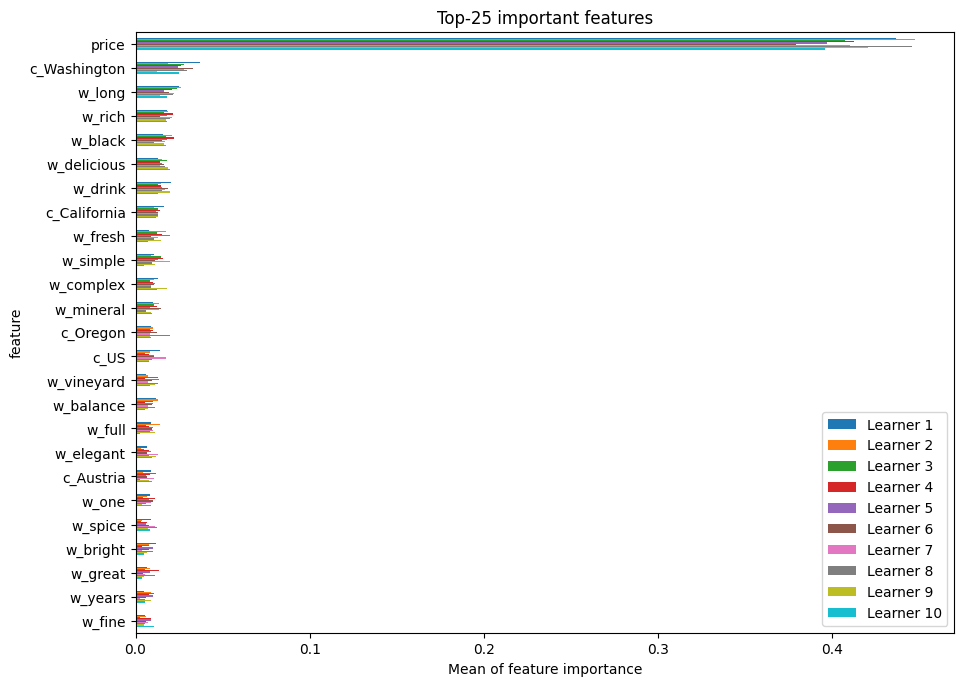

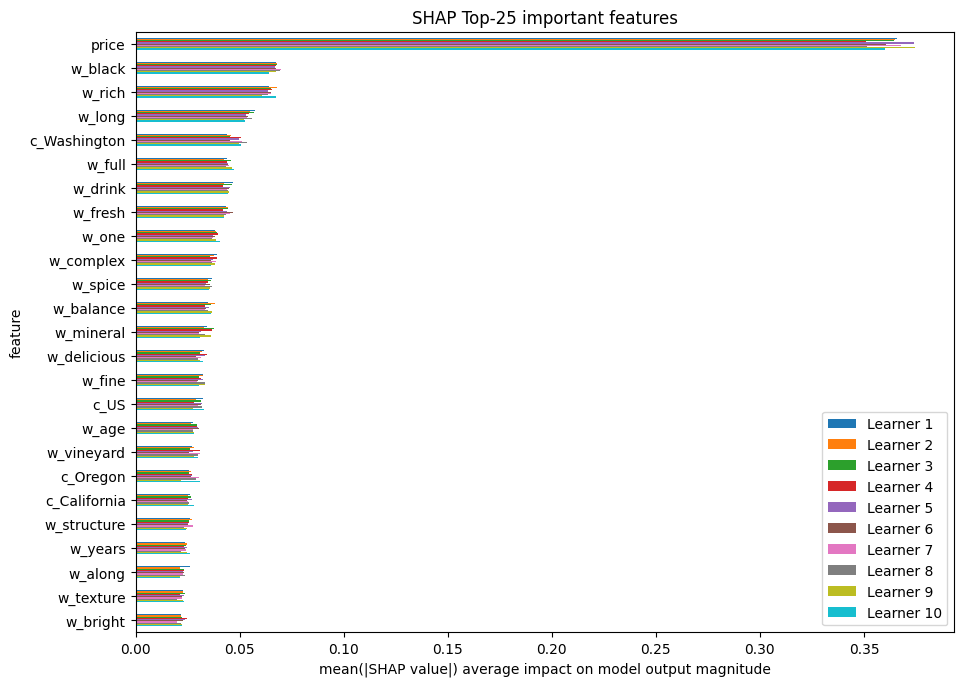

In [4]:
# train models with AutoML Optuna XGBoost
automl = AutoML(mode="Optuna",explain_level = 2,total_time_limit= 2*3600,algorithms=['Xgboost'])
automl.fit(X_train, y_train)

predictions = automl.predict(X_test)
print("Test MSE:", mean_squared_error(y_test, predictions))